In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

In [60]:
clf = RandomForestClassifier()
forest = clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.9298245614035088

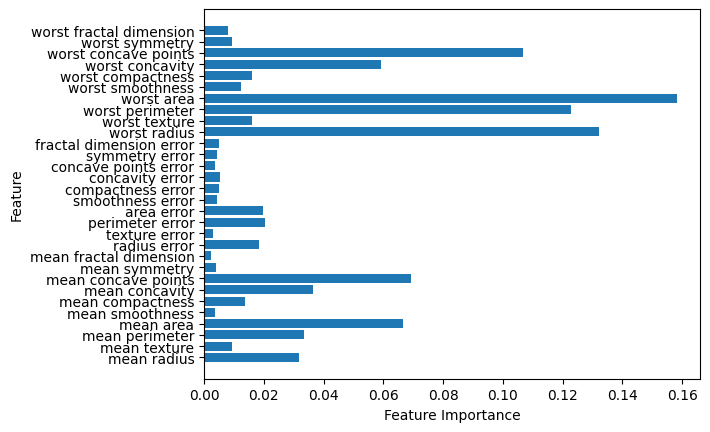

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_features = cancer.data.shape[1]

n_features = cancer.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [62]:
clf = RandomForestClassifier(n_estimators = 10)
forest = clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.9122807017543859

In [63]:
clf = RandomForestClassifier(n_estimators = 1000)
forest = clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.9298245614035088

In [64]:
clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
forest = clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.9385964912280702

In [65]:
clf = RandomForestClassifier(n_estimators = 100, criterion = 'log_loss')
forest = clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.9473684210526315

In [66]:
clf = RandomForestClassifier(n_estimators = 100, bootstrap = False)
forest = clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.9298245614035088

In [67]:
clf = RandomForestClassifier(n_estimators = 1000, max_features = 10)
forest = clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.9298245614035088

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV

In [69]:
rng = np.random.RandomState(0)

# X, x_test, y, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=rng)

clf = RandomForestClassifier(n_estimators=20, random_state=rng)

param_dist = {
    "n_estimators":[10,50,100,200],
    "max_depth": [3, None],
    "max_features": randint(1, 15),
    "min_samples_split": randint(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy", "log_loss"],
}

rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=rng
)
rsh.fit(cancer.data, cancer.target)

HalvingRandomSearchCV(estimator=RandomForestClassifier(n_estimators=20,
                                                       random_state=RandomState(MT19937) at 0x7F3A348E5540),
                      factor=2,
                      param_distributions={'bootstrap': [True, False],
                                           'criterion': ['gini', 'entropy',
                                                         'log_loss'],
                                           'max_depth': [3, None],
                                           'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3a3478bc10>,
                                           'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f3a3456ce20>,
                                           'n_estimators': [10, 50, 100, 200]},
                      random_state=RandomState(MT19937) at 0x7F3A348E5540)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_split': 8, 'n_estimators': 200}


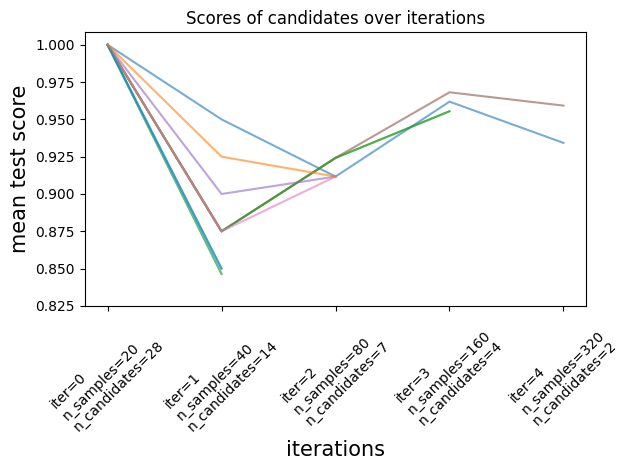

In [70]:
results = pd.DataFrame(rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

print(results.params_str.values[-1])

labels = [
    f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
    for i in range(rsh.n_iterations_)
]

ax.set_xticks(range(rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()

In [55]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2)

clf = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 3, max_features= 3, min_samples_split= 3, n_estimators= 100, oob_score= True)
forest = clf.fit(x_train, y_train)

print(clf.score(x_train, y_train))
print(clf.oob_score_)

0.9868131868131869
0.9494505494505494
